# Código del profe


In [201]:
import numpy as np
import matplotlib.pyplot as plt


def inicializar_pesos(n_entrada, n_capa_2, n_capa_3):
    randomgen = np.random.default_rng()

    #w son los pesos, b son los sesgos. En este caso tenemos 2 capas luego de la capa de entrada
    
    #Se inicializan con un valor bajo. Por eso se multiplilcan por 0.1
    w1 = 0.1 * randomgen.standard_normal((n_entrada, n_capa_2))
    b1 = 0.1 * randomgen.standard_normal((1, n_capa_2))

    w2 = 0.1 * randomgen.standard_normal((n_capa_2, n_capa_3))
    b2 = 0.1 * randomgen.standard_normal((1,n_capa_3))

    return {"w1": w1, "b1": b1, "w2": w2, "b2": b2}


def ejecutar_adelante(x, pesos):
    # Funcion de entrada (a.k.a. "regla de propagacion") para la primera capa oculta
    z = x.dot(pesos["w1"]) + pesos["b1"]
    #Por más que b1 sea un vector y la multiplicación de x*w sea una matriz, como tienen la misma cantidad de columnas, se puede hacer la suma porque numpy intuye que queremos sumar a cada fila de la matriz el mismo vector b.

    # Funcion de activacion ReLU para la capa oculta (h -> "hidden")
    h = np.maximum(0, z)
    #Esta función de activación convierte a 0 los valores negativos, y deja como está a los valores positivos.

    # Salida de la red (funcion de activacion lineal). Esto incluye la salida de todas
    # las neuronas y para todos los ejemplos proporcionados
    y = h.dot(pesos["w2"]) + pesos["b2"]

    return {"z": z, "h": h, "y": y}



In [ ]:
#recibe un vector, y devuelve un vector, pero aplicando la función sigmoide a cada elemento
def sigmoide(x):
    return 1 / (1 + np.exp(-x))

Train

Modificado para poder resolver problemas de regresión

In [ ]:

# x: n entradas para cada uno de los m ejemplos(nxm)
# t: salida correcta (target) para cada uno de los m ejemplos (m x 1)
# pesos: pesos (W y b)
def train(x, t, pesos, learning_rate, epochs, funcion_activacion):
    
    # Cantidad de filas (i.e. cantidad de ejemplos)
    m = np.size(x, 0)

    
    for i in range(epochs):
        # Ejecucion de la red hacia adelante
        resultados_feed_forward = ejecutar_adelante(x, pesos)
        y = resultados_feed_forward["y"]
        h = resultados_feed_forward["h"]
        z = resultados_feed_forward["z"]

        '''--- EJERCICIO 5: MODIFICACION DE LOSS ---'''
        loss = (1 / m) * np.sum( np.square( t-y ))
        '''--- END EJERCICIO 5: MODIFICACION DE LOSS ---'''

        # Extraemos los pesos a variables locales
        w1 = pesos["w1"]
        b1 = pesos["b1"]
        w2 = pesos["w2"]
        b2 = pesos["b2"]

        '''--- EJERCICIO 5: MODIFICACION DE DERIVADAS ---'''
        # Ajustamos los pesos: Backpropagation

        dL_dy = 2/m*(y-t)

        dL_dw2 = h.T.dot(dL_dy)                         # Ajuste para w2
        dL_db2 = np.sum(dL_dy, axis=0, keepdims=True)   # Ajuste para b2

        dL_dh = dL_dy.dot(w2.T)
        
        if funcion_activacion=='relu':
            dL_dz = dL_dh       # El calculo dL/dz = dL/dh * dh/dz. La funcion "h" es la funcion de activacion de la capa oculta,
            dL_dz[z <= 0] = 0   # para la que usamos ReLU. La derivada de la funcion ReLU: 1(z > 0) (0 en otro caso)
        
        elif funcion_activacion=='sigmoide':
            print(z)
            print(sigmoide(z))
            print()
            dL_dz = dL_dh*sigmoide(z)*(1-sigmoide(z))

        dL_dw1 = x.T.dot(dL_dz)                         # Ajuste para w1
        dL_db1 = np.sum(dL_dz, axis=0, keepdims=True)   # Ajuste para b1
        '''--- END EJERCICIO 5: MODIFICACION DE DERIVADAS ---'''

        # Aplicamos el ajuste a los pesos
        w1 += -learning_rate * dL_dw1
        b1 += -learning_rate * dL_db1
        w2 += -learning_rate * dL_dw2
        b2 += -learning_rate * dL_db2

        # Actualizamos la estructura de pesos
        # Extraemos los pesos a variables locales
        pesos["w1"] = w1
        pesos["b1"] = b1
        pesos["w2"] = w2
        pesos["b2"] = b2


def iniciar(numero_ejemplos,graficar_datos,N_epochs_ej3, tolerancia_ej3):
    # Generamos datos
    x, t = generar_datos_regresion(numero_ejemplos)

    # Graficamos los datos si es necesario
    if graficar_datos:
        # Crear el gráfico de calor
        plt.scatter(x[:,0], x[:,1], c=t, cmap='coolwarm')
        plt.colorbar()

        # Personalizar el gráfico
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title('Gráfico de Calor de t=f(x1,x2)')

        # Mostrar el gráfico
        plt.show()

    # Inicializa pesos de la red
    NEURONAS_CAPA_OCULTA = 100
    NEURONAS_ENTRADA = 2
    NEURONAS_SALIDA = 1
    pesos = inicializar_pesos(n_entrada=NEURONAS_ENTRADA, n_capa_2=NEURONAS_CAPA_OCULTA, n_capa_3=NEURONAS_SALIDA)

    # Entrena
    LEARNING_RATE=0.01
    EPOCHS=10000
    train(x, t, pesos, LEARNING_RATE, EPOCHS, N_epochs_ej3=N_epochs_ej3, tolerancia_ej3 = tolerancia_ej3)

# Ejercicio 5

Modificar el programa para que funcione para resolver problemas de regresión

> a. Debe modificarse la función de pérdida y sus derivadas, utilizando por ejemplo MSE

> b. Debe crearse un generador de datos nuevo para que genere datos continuos (pueden
> mantenerse igualmente 2 entradas; en caso de usar más entradas puede requerirse más
> capas en la red neuronal)


In [1]:
'''Generador de datos continuos'''

def generar_datos_regresion(cantidad_ejemplos):
    # Generar datos de ejemplo
    n = cantidad_ejemplos
    x1 = np.random.uniform(0, 10, n)
    x2 = np.random.uniform(0, 10, n)
    x = np.c_[x1, x2]
    t = funcion_salida(x1, x2) 
    
    #La shape de t es (500,)
    # Agrego una nueva dimensión a t. Esto es para que coincida con la dimensión de y, que es (500,1)
    t = np.reshape(t, (cantidad_ejemplos,1))

    return x, t

def funcion_salida(x1, x2):
    # Definir una función para la relación entre x1, x2 y y
    t = np.sin(x1) + np.cos(x2)
    return t

# Ejercicio 6

Realizar un barrido de parámetros (learning rate, cantidad de neuronas en la capa oculta,
comparación de ReLU con Sigmoide)

In [205]:
from sklearn.metrics import r2_score

def r2_ej5(x,t,pesos,conjunto,imprimir=False):
    resultados_feed_forward = ejecutar_adelante(x, pesos)
    y = resultados_feed_forward["y"]
    r2 = r2_score(t,y)
    
    if imprimir:
        print("El r^2 de", conjunto, "es" ,r2)
        
    return


# Ejecucion


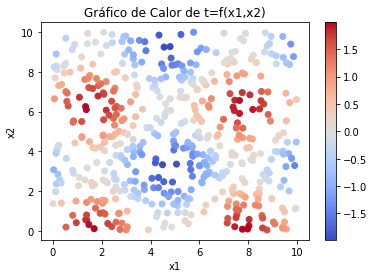

Loss epoch 0 : 1.7152451284775598
Loss epoch 1000 : 0.748365824386015
Loss epoch 2000 : 0.633992771418546
Loss epoch 3000 : 0.5279515475375806
Loss epoch 4000 : 0.45076201073217625
Loss epoch 5000 : 0.396137872893064
Loss epoch 6000 : 0.34501792931408565
Loss epoch 7000 : 0.3075304226508529
Loss epoch 8000 : 0.28097793705139146
Loss epoch 9000 : 0.26476845845474806
El r^2 de train es 0.7315810393216858
El r^2 de test es 0.7167824699803782


In [206]:
iniciar(numero_ejemplos=500, graficar_datos=True, N_epochs_ej3=100, tolerancia_ej3=20)

'''PARA HACER ESTE EJERCICIO, FUE NECESARIO MODIFICAR LA FUNCIÓN DE LOSS, LAS DERIVADAS PARCIALES.TAMBIÉN SE BAJÓ EL LEARNING RATE DE 1 A 0.01 PARA QUE DE UN BUEN RESULTADO. COMO MEDIDA DE RENDIMIENTO SE USA R^2'''